In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [28]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##### the index dtype and columns, non-null values and memory usage

## Check null values

In [30]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### count the number per shipping mode

Text(0, 0.5, 'Number of orders')

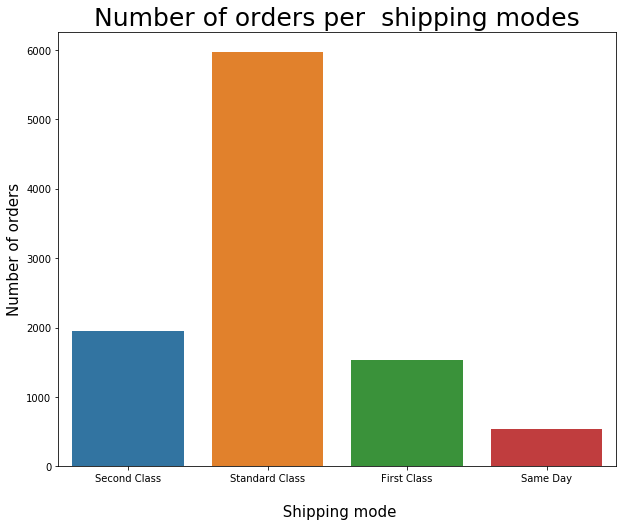

In [31]:

plt.figure(figsize=(10,8))
sns.countplot('Ship Mode',data=data)

plt.title('Number of orders per  shipping modes',size=25)
plt.xlabel('\n Shipping mode',size=15)
plt.ylabel('Number of orders',size=15)


#####  standard class are the most preferring  shipping mode while  same day delivery is the least preferred.



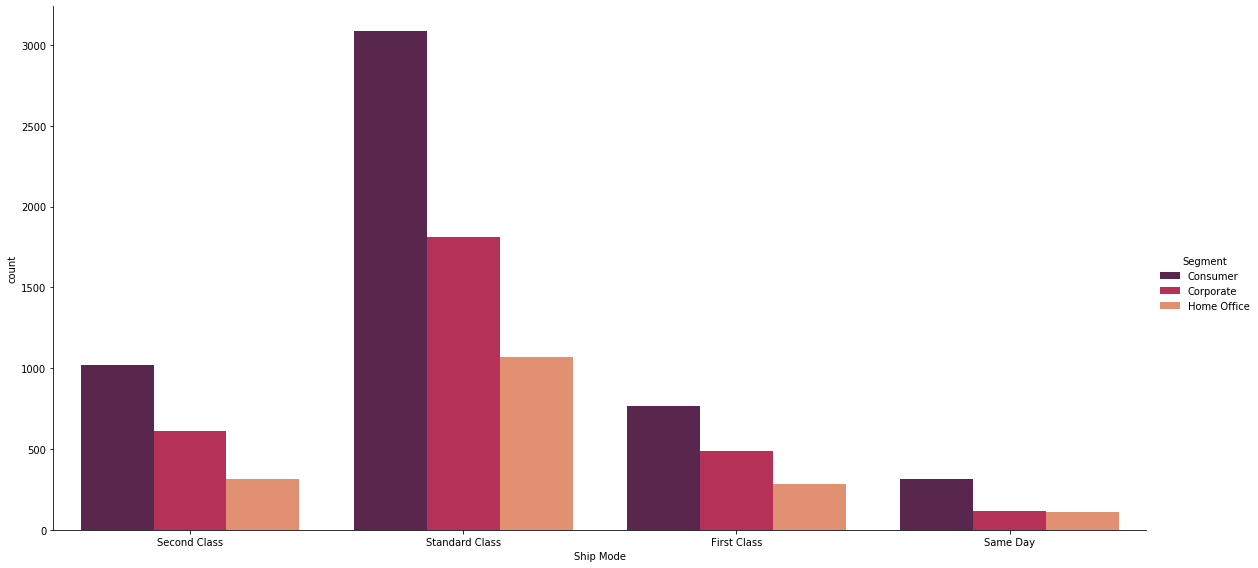

In [32]:
sns.catplot('Ship Mode',hue='Segment',data=data,kind='count',palette='rocket',aspect=2,height=8)


##### through all shipping mode consumers have the high number than coporate or home office .

### the amount of sales of cities


In [33]:
sales_city=data.groupby('City')['Sales'].sum().reset_index()
sales_city

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2729.986
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
526,Woonsocket,195.550
527,Yonkers,7657.666
528,York,817.978
529,Yucaipa,50.800


### cities with highest sales

In [34]:

df_top10=top_cities_sales.head(10)
df_top10.reset_index(inplace=True,drop=True)
df_top10.head(10)

,City,Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


Text(0.5, 1, 'Top 10 Cities by sales')

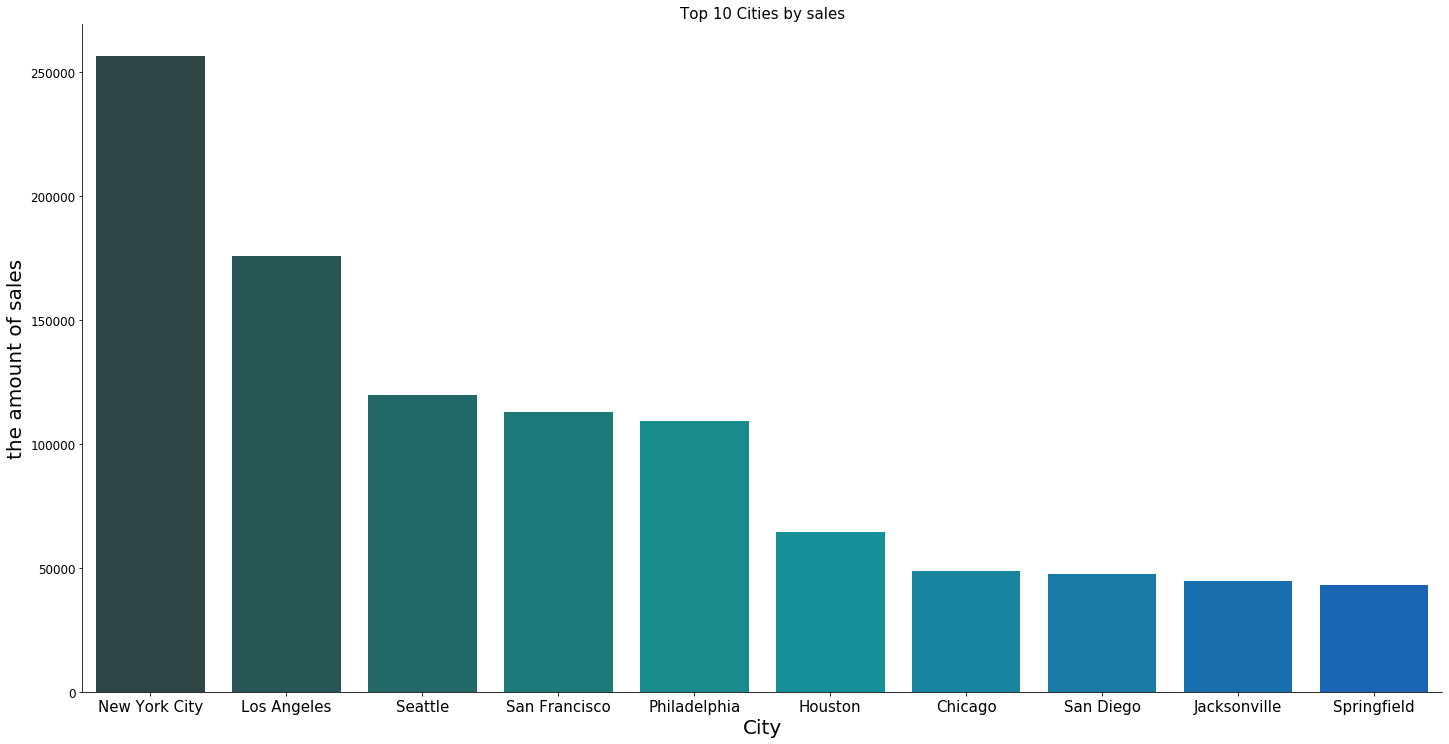

In [35]:
sns.catplot('City','Sales',data=df_top10,kind='bar',height=10,aspect=2,palette='winter_d')
plt.xlabel("City",size=20)
plt.ylabel("the amount of sales",size=20)
plt.xticks(size=15,rotation=0)
plt.yticks(size=12)
plt.title("Top 10 Cities by sales",size=15)

#### Cities with less amount of  selling

In [36]:
df_less_10=sales_city.tail(10).sort_values(by='Sales',ascending=True)
df_less_10.reset_index(inplace=True,drop=True)
df_less_10.head(10)

,City,Sales
0,Yucaipa,50.800
1,Woonsocket,195.550
2,Woodland,264.662
3,Wilson,368.732
4,Woodbury,607.650
5,York,817.978
6,Yuma,840.865
7,Woodstock,1143.900
8,Wilmington,7297.061
9,Yonkers,7657.666


Text(0.5, 1, 'less 10 selling  Cities ')

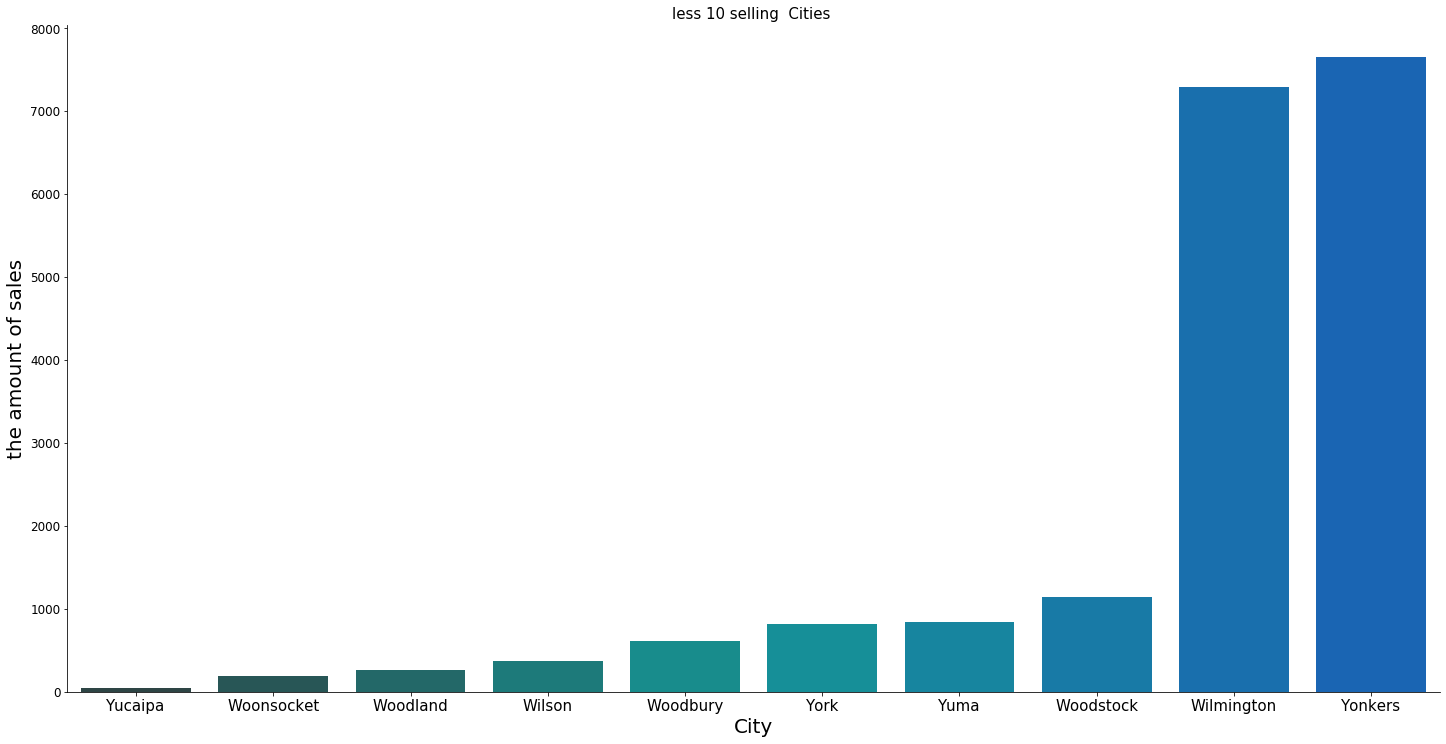

In [37]:
sns.catplot('City','Sales',data=df_less_10,kind='bar',height=10,aspect=2,palette='winter_d')
plt.xlabel("City",size=20)
plt.ylabel("the amount of sales",size=20)
plt.xticks(size=15,rotation=0)
plt.yticks(size=12)
plt.title("less 10 selling  Cities ",size=15)

### sub-category with high profit

In [38]:
df_top_10_profitable_items=data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_top_10_profitable_items.reset_index(drop=True,inplace=True)
df_top_10_profitable_items=df_top_10_profitable_items.head(10)

Text(-8.700000000000003, 0.5, 'Cumulative Profit')

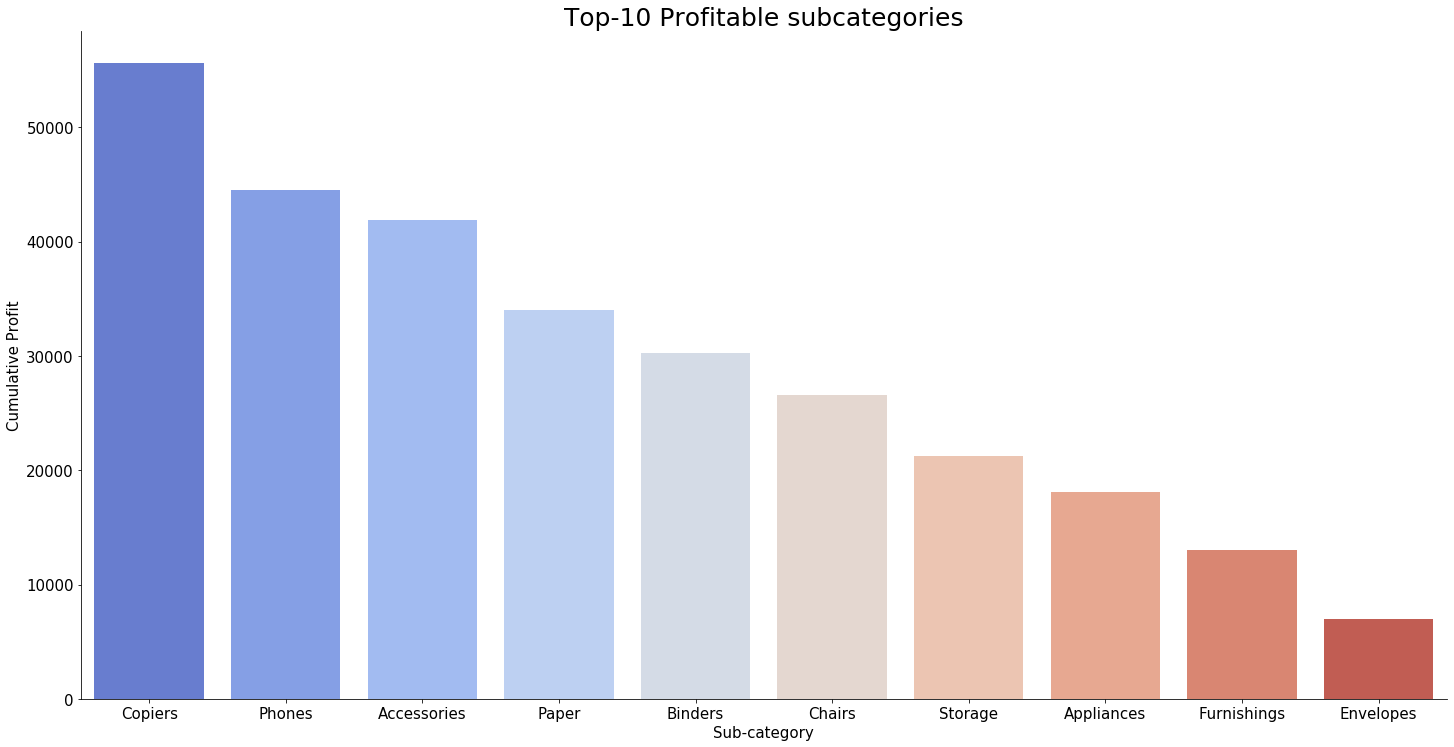

In [39]:
sns.catplot('Sub-Category','Profit',data=df_top_10_profitable_items,kind='bar',height=10,aspect=2,palette='coolwarm')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Top-10 Profitable subcategories",size=25)
plt.xlabel('Sub-category',size=15)
plt.ylabel("Cumulative Profit",size=15)

### the amount of profit for each categories


In [40]:
df_profits=data.groupby('Category')['Profit'].sum().reset_index()
df_profits

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Distibution of Profits Category wise')

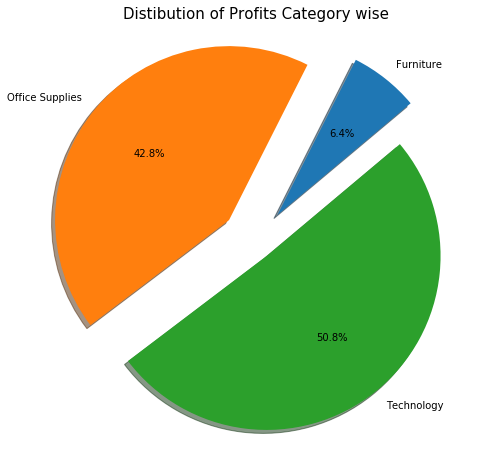

In [41]:
plt.figure(figsize=(10,8))
plt.pie('Profit',labels=df_profits['Category'],data=df_profits,autopct='%1.1f%%',shadow=True,explode=(0.2,0.2,0.1),startangle=40)
plt.title('Distibution of Profits Category wise',size=15)